In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_campaign_data_enriched.csv')
print("Dataset loaded successfully!")

df['Date'] = pd.to_datetime(df['Date'])

Dataset loaded successfully!


Before any tasks, establish a baseline for the overall performance for benchmarking. This provides context for all subsequent, more granular analyses

Calculate overall average for all numeric features (KPIs) for all campaigns:
- Conversion_Rate
- ROI
- Acquisition_Cost
- Clicks
- Impressions
- Engagement_Score
- Cost_Per_Click
- Click_Through_Rate
- Estimated_Conversions
- Cost_Per_Acquisition
- Estimated_Profit

In [2]:
# Calculate the mean for each relevant numerical column

overall_kpis = {
    'Average Conversion Rate': df['Conversion_Rate'].mean(),
    'Average ROI': df['ROI'].mean(),
    'Average Acquisition Cost': df['Acquisition_Cost'].mean(),
    'Average Clicks': df['Clicks'].mean(),
    'Average Impressions': df['Impressions'].mean(),
    'Average Engagement Score': df['Engagement_Score'].mean(),
    'Average Cost Per Click': df['Cost_Per_Click'].mean(),
    'Average Click Through Rate': df['Click_Through_Rate'].mean(),
    'Total Estimated Conversions': df['Estimated_Conversions'].sum(), # Sum for total conversions
    'Average Cost Per Acquisition': df['Cost_Per_Acquisition'].mean(),
    'Total Estimated Profit': df['Estimated_Profit'].sum() # Sum for total profit
}

for kpi, value in overall_kpis.items():
    if kpi == 'Average Click Through Rate': # Specific handling for CTR
        print(f"{kpi}: {value:.2f}%") # Print as float with % sign, no further multiplication
    elif 'Rate' in kpi: # For Conversion_Rate, which is a decimal (e.g., 0.08)
        print(f"{kpi}: {value:.2%}") # Format as percentage (multiplies by 100)
    elif 'Cost' in kpi or 'Profit' in kpi:
        print(f"{kpi}: ${value:,.2f}") # Format as currency
    else:
        print(f"{kpi}: {value:,.0f}") # Format as integer for counts/scores


Average Conversion Rate: 8.01%
Average ROI: 5
Average Acquisition Cost: $12,504.39
Average Clicks: 550
Average Impressions: 5,507
Average Engagement Score: 5
Average Cost Per Click: $32.01
Average Click Through Rate: 14.04%
Total Estimated Conversions: 88,133,988
Average Cost Per Acquisition: $63.32
Total Estimated Profit: $12,517,388,674.24


**Observations from Overall KPIs:**

- **Average Conversion Rate: 8.01%**: 8% is solid.

- **Average ROI: 5**: An average, for every dollar invested, GigaGrow's clients are getting $5 back. A strong ROI!

- **Average Acquisition Cost: $12,504.39**: The average cost to run a campaign. It's a significant investment per campaign.

- **Average Clicks: 550:**: A modest number of clicks per campaign.

- **Average Impressions: 5,507:** For every 5,507 times a campaign was displayed, it got 550 clicks, which ties into CTR.

> **Average Engagement Score: 5** A mid-range score (out of 10), suggesting average engagement. Will see how this correlates with conversion and ROI later.

> **Average Cost Per Click: $32.01**  $32 per click suggests either very niche/high-value clicks or potentially inefficient bidding/targeting. A metric to investigate further when break down by channel.

> **Average Click Through Rate: 14.04%**: On average, 14.04% of people who see the ads click on them. An excellent average CTR. It suggests that the ads are highly relevant

- **Total Estimated Conversions: 88,133,988:** A Sum of all estimated conversions across all campaigns in the dataset. A huge number of conversions.

- **Average Cost Per Acquisition: $63.32:** Relatively low compared to the average campaign cost, which is positive. It means conversions are reasonably affordable on average.

- **Total Estimated Profit: $12,517,388,674.24** A massive total profit!

------------------------------------------------------------------------------------------------------------------------------
**Insights:** 

    - Highly successful and large-scale digital marketing operations. 
    - Despite relatively high costs per click and per acquisition, the campaigns are delivering excellent engagement, strong conversion rates, and ultimately, very significant profitability. 
    - The high average acquisition cost and total profit suggest these are campaigns with substantial budgets aiming for high-value conversions.


**With overall kpis, analyze what works and does not for specific campaign types, channels, and audiences.**


--- Performance by Campaign Type ---

Performance by Campaign Type (Sorted by Average ROI):
                Avg_ROI  Avg_Conversion_Rate  Avg_Acquisition_Cost  \
Campaign_Type                                                        
Influencer     5.011068             0.080315          12507.170330   
Search         5.008357             0.080021          12498.736459   
Display        5.006551             0.080089          12508.034461   
Email          4.994295             0.079788          12495.346100   
Social Media   4.991784             0.080135          12512.698094   

               Total_Estimated_Profit  Total_Estimated_Conversions  
Campaign_Type                                                       
Influencer               2.518951e+09                     17745389  
Search                   2.514604e+09                     17673273  
Display                  2.504836e+09                     17597834  
Email                    2.491041e+09                     17570191  
So

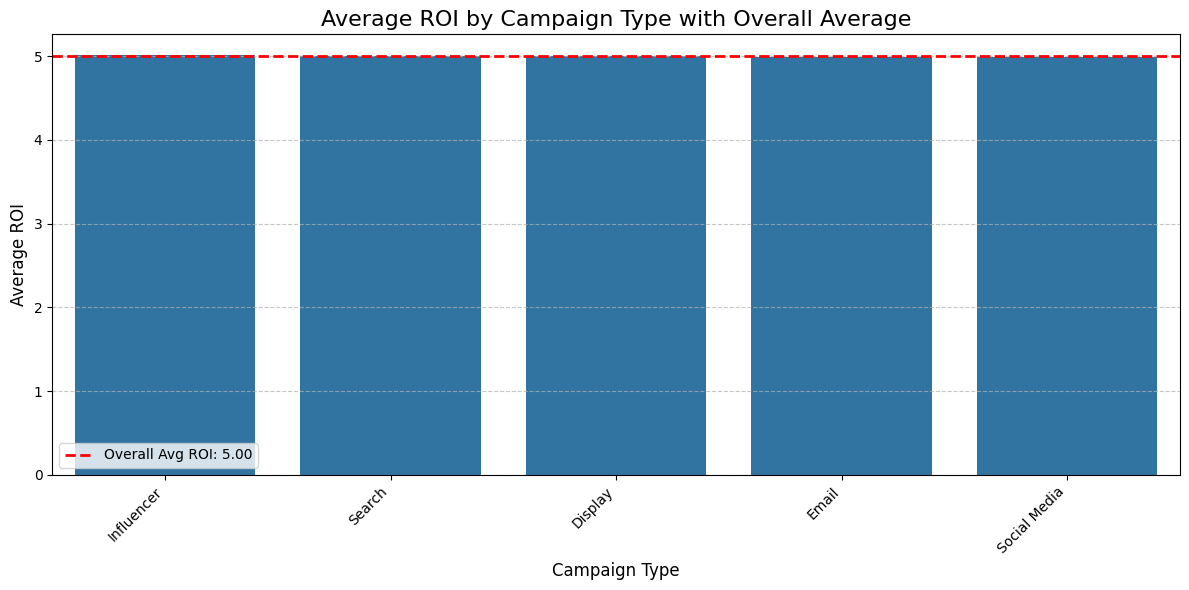

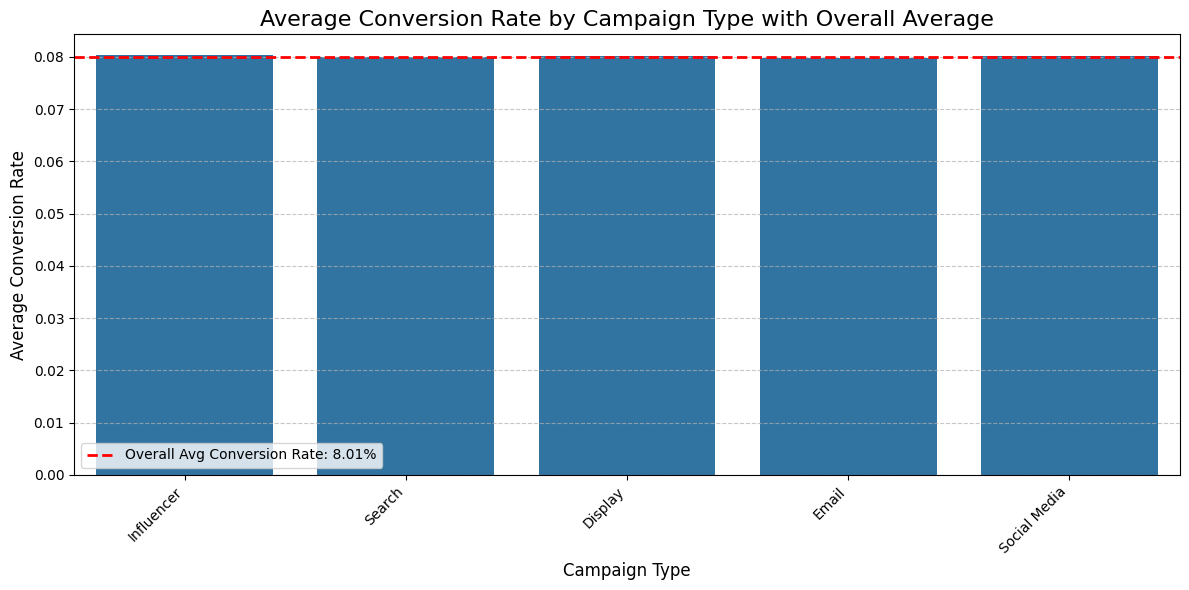

In [3]:
# By Campaign Type

print("\n--- Performance by Campaign Type ---")
campaign_type_performance = df.groupby('Campaign_Type').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Avg_Acquisition_Cost=('Acquisition_Cost', 'mean'),
    Total_Estimated_Profit=('Estimated_Profit', 'sum'), # Sum profit per campaign type
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum') # Sum conversions per type
).sort_values(by='Avg_ROI', ascending=False) # Sort to easily see top performers

print("\nPerformance by Campaign Type (Sorted by Average ROI):")
print(campaign_type_performance)

# Plot Average ROI by Campaign Type'
overall_avg_roi = df['ROI'].mean()
overall_avg_conversion_rate = df['Conversion_Rate'].mean()

# Plot Average ROI by Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_type_performance.index, y=campaign_type_performance['Avg_ROI'])
plt.axhline(overall_avg_roi, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ROI: {overall_avg_roi:.2f}')
plt.title('Average ROI by Campaign Type with Overall Average', fontsize=16)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend() # Show the label for the overall average line
plt.tight_layout()
plt.show()

# Plot Average Conversion Rate by Campaign Type
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_type_performance.index, y=campaign_type_performance['Avg_Conversion_Rate'])
plt.axhline(overall_avg_conversion_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Avg Conversion Rate: {overall_avg_conversion_rate:.2%}')
plt.title('Average Conversion Rate by Campaign Type with Overall Average', fontsize=16)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend() # Show the label for the overall average line
plt.tight_layout()
plt.show()

**Observations from Performance by Campaign Type:**
**Consistency Across Campaign Types:**

- **Avg_ROI:** The average ROI across all campaign types is incredibly similar, ranging only from 4.99 (Social Media) to 5.01 (Influencer). 
- **Avg_Conversion_Rate:** Similarly, conversion rates are almost identical, hovering around 0.08 (8%).
- **Avg_Acquisition_Cost:** The average cost per campaign is also very consistent around $12,500.
- **Total_Estimated_Profit and Total_Estimated_Conversions:** Also show very similar magnitudes, suggesting roughly an even distribution of campaigns.

----------------------------------------------------------------------------------------------------------------------------

**Insights**

> There isn't a single campaign type that significantly outperforms the others. All campaign types seem to be delivering very consistent results for GigaGrow's clients.

> GigaGrow doesn't need to drastically shift budget between campaign types for better average ROI or Conversion Rate. They all perform roughly equally.

- GigaGrow's optimization efforts might need to focus on other dimensions, such as:
    - Efficiency: Are some channels within a campaign type more efficient (e.g., lower CPA)?
    - Specific Audiences/Segments: Do certain audiences respond better to specific campaign types even if the overall average is similar?
    - Scalability: Are some campaign types easier or cheaper to scale up?
    - Time-Based Performance: Do certain types perform better during specific months or days?


--- Performance by Channel Used ---

Performance by Channel Used (Sorted by Average ROI):
               Avg_ROI  Avg_Conversion_Rate  Avg_Cost_Per_Acquisition  \
Channel_Used                                                            
Facebook      5.018699             0.079992                 62.881104   
Website       5.014167             0.080183                 63.419202   
Google Ads    5.003141             0.080183                 63.536675   
Email         4.996487             0.080282                 62.798870   
YouTube       4.993754             0.079889                 64.158836   
Instagram     4.988706             0.079886                 63.124452   

              Avg_Cost_Per_Click  Total_Estimated_Profit  \
Channel_Used                                               
Facebook               32.129253            2.063945e+09   
Website                31.779545            2.087559e+09   
Google Ads             32.309304            2.097811e+09   
Email                  3

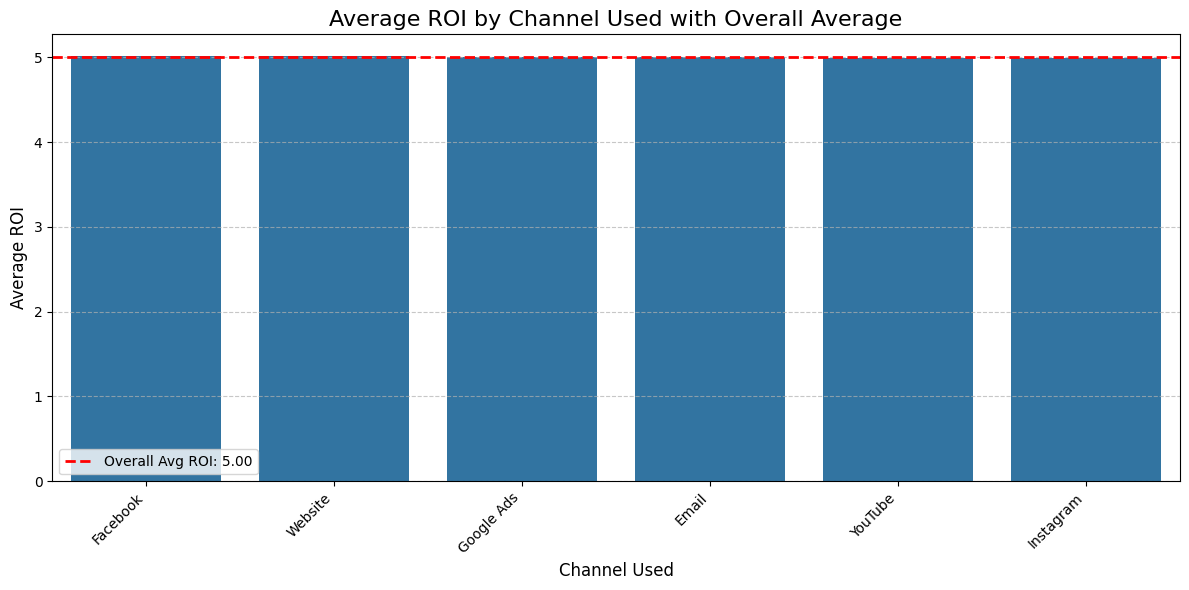

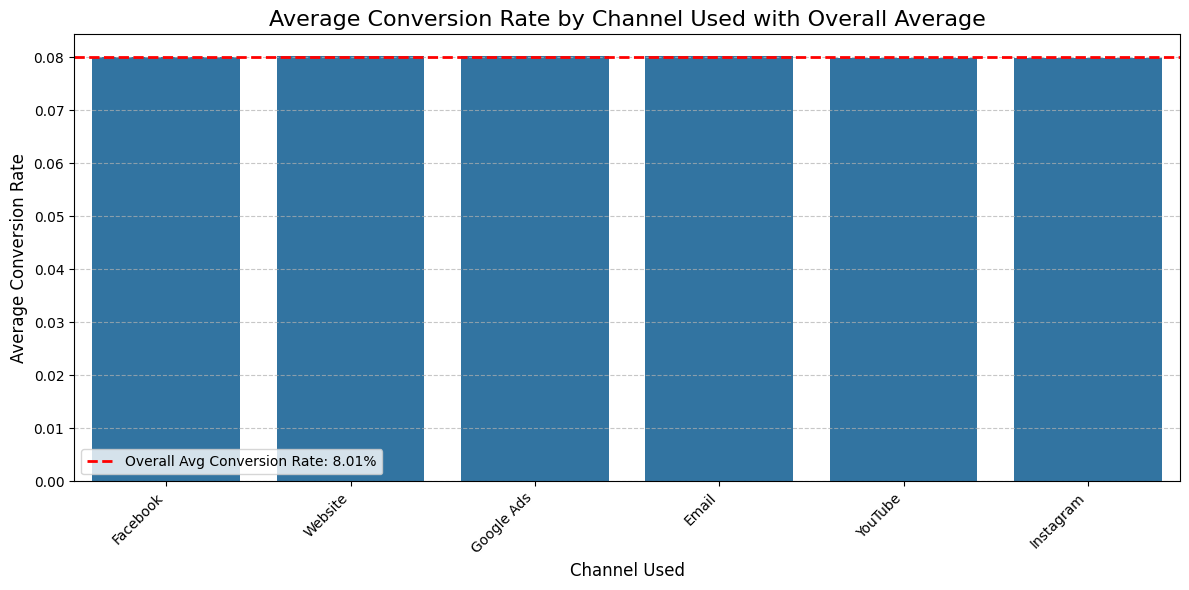

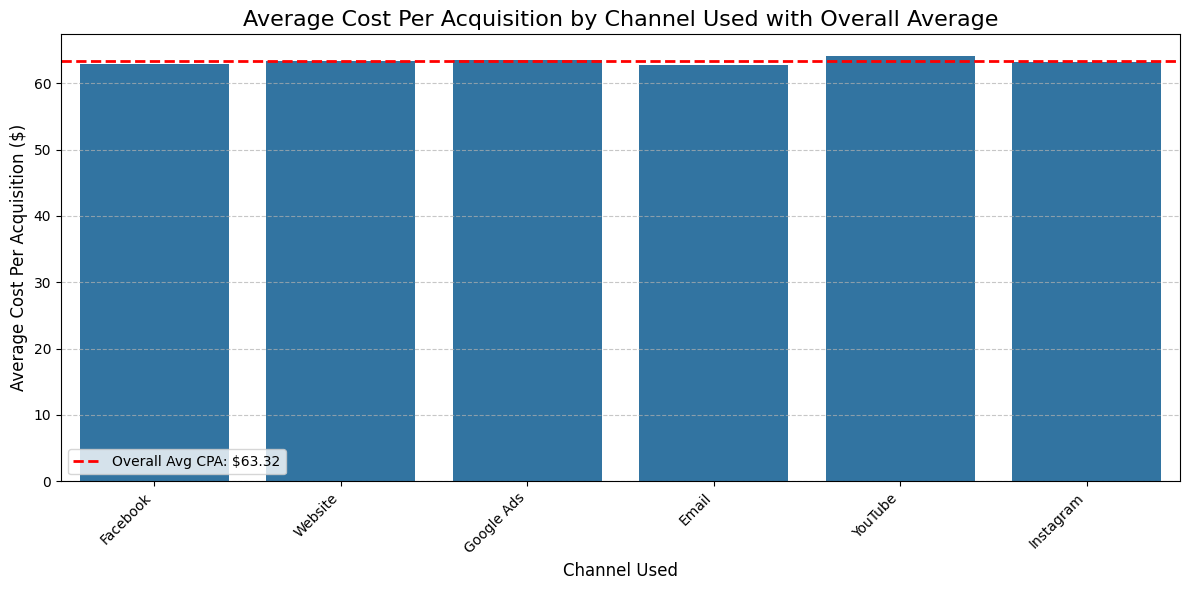

In [4]:
# By Channel

print("\n--- Performance by Channel Used ---")

# Step 9.1: Group by Channel_Used and calculate average key metrics
channel_performance = df.groupby('Channel_Used').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Avg_Cost_Per_Acquisition=('Cost_Per_Acquisition', 'mean'), # Crucial for cost-effectiveness
    Avg_Cost_Per_Click=('Cost_Per_Click', 'mean'), # Also important for cost-effectiveness
    Total_Estimated_Profit=('Estimated_Profit', 'sum'),
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum')
).sort_values(by='Avg_ROI', ascending=False) # Sort by ROI first

print("\nPerformance by Channel Used (Sorted by Average ROI):")
print(channel_performance)

# Get overall averages for lines
overall_avg_cpa = df['Cost_Per_Acquisition'].mean()
overall_avg_cpc = df['Cost_Per_Click'].mean()


# Step 9.2: Visualize Performance by Channel Used

# Plot Average ROI by Channel Used
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_performance.index, y=channel_performance['Avg_ROI'])
plt.axhline(overall_avg_roi, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ROI: {overall_avg_roi:.2f}')
plt.title('Average ROI by Channel Used with Overall Average', fontsize=16)
plt.xlabel('Channel Used', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Average Conversion Rate by Channel Used
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_performance.index, y=channel_performance['Avg_Conversion_Rate'])
plt.axhline(overall_avg_conversion_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Avg Conversion Rate: {overall_avg_conversion_rate:.2%}')
plt.title('Average Conversion Rate by Channel Used with Overall Average', fontsize=16)
plt.xlabel('Channel Used', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Average Cost Per Acquisition by Channel Used
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_performance.index, y=channel_performance['Avg_Cost_Per_Acquisition'])
plt.axhline(overall_avg_cpa, color='red', linestyle='--', linewidth=2, label=f'Overall Avg CPA: ${overall_avg_cpa:,.2f}')
plt.title('Average Cost Per Acquisition by Channel Used with Overall Average', fontsize=16)
plt.xlabel('Channel Used', fontsize=12)
plt.ylabel('Average Cost Per Acquisition ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Observations from Performance by Channel Used:**
- Similar to Campaign Type, the analysis of Channel_Used suggests that on average, GigaGrow's campaigns perform with remarkable consistency across different marketing channels. 
--------------------------------------------------------------------------------------------------------------------------------

**Insights:**
- The data shows that GigaGrow can pretty much use any of these campaign types or channels and expect similar average returns. 
- This might mean the specific content, targeting, or combination of factors within a campaign is more important than the general type or channel itself.


--- Performance by Gender Target ---

Performance by Gender Target (Sorted by Average ROI):
                  Avg_ROI  Avg_Conversion_Rate  Avg_Acquisition_Cost  \
Gender_Target                                                          
Unspecified/All  5.005174             0.079975          12501.914915   
Female           5.001822             0.080000          12508.026449   
Male             5.001685             0.080186          12502.021238   

                 Total_Estimated_Profit  Total_Estimated_Conversions  
Gender_Target                                                         
Unspecified/All            2.506269e+09                     17595904  
Female                     4.988559e+09                     35158303  
Male                       5.022561e+09                     35379781  


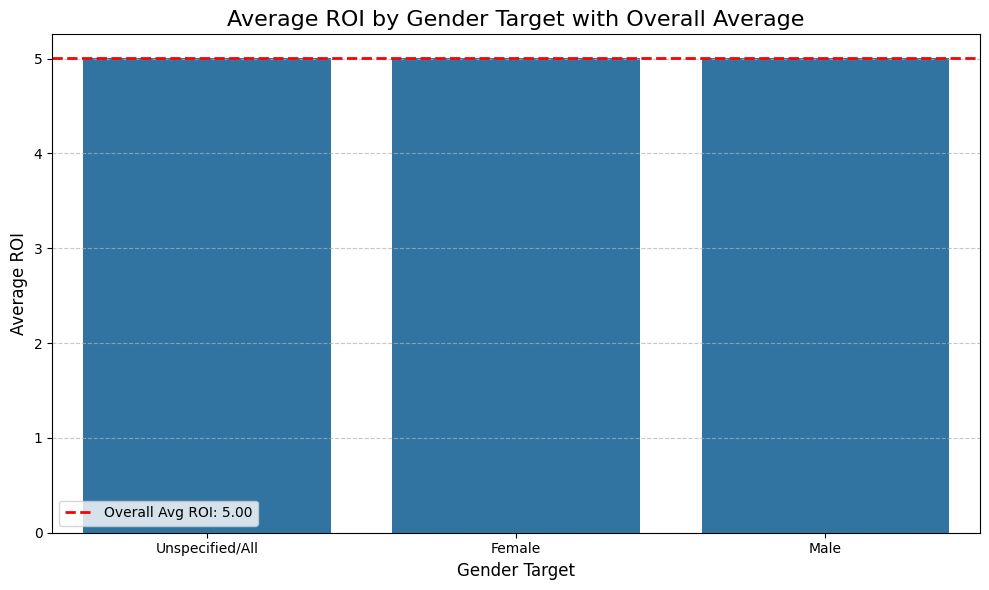

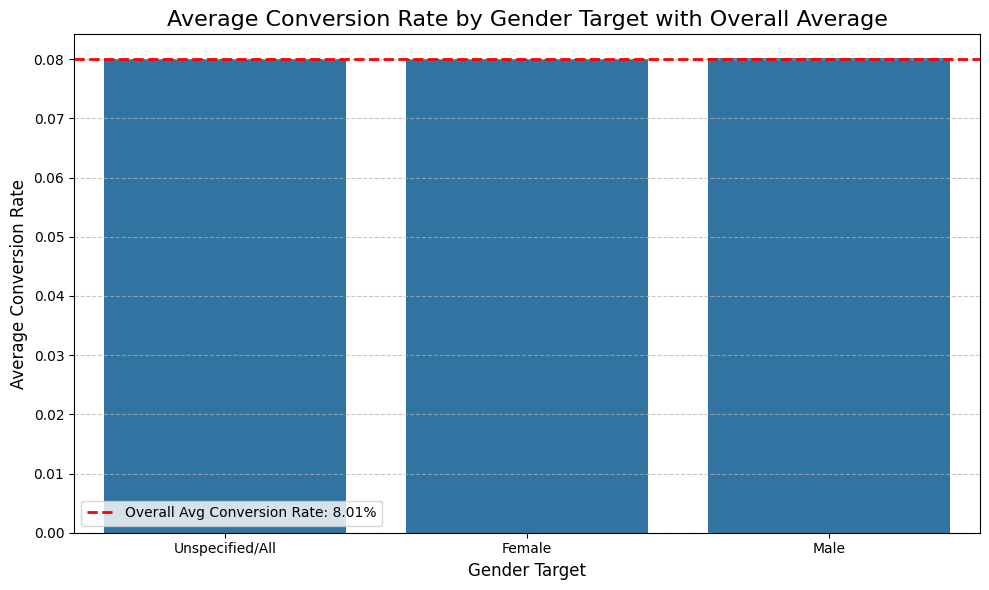

In [9]:
# By Gender Target


print("\n--- Performance by Gender Target ---")


gender_performance = df.groupby('Gender_Target').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Avg_Acquisition_Cost=('Acquisition_Cost', 'mean'),
    Total_Estimated_Profit=('Estimated_Profit', 'sum'),
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum')
).sort_values(by='Avg_ROI', ascending=False) 

print("\nPerformance by Gender Target (Sorted by Average ROI):")
print(gender_performance)

# Visualize Performance by Gender Target

# Plot Average ROI by Gender Target
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_performance.index, y=gender_performance['Avg_ROI'])
plt.axhline(overall_avg_roi, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ROI: {overall_avg_roi:.2f}')
plt.title('Average ROI by Gender Target with Overall Average', fontsize=16)
plt.xlabel('Gender Target', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Average Conversion Rate by Gender Target
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_performance.index, y=gender_performance['Avg_Conversion_Rate'])
plt.axhline(overall_avg_conversion_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Avg Conversion Rate: {overall_avg_conversion_rate:.2%}')
plt.title('Average Conversion Rate by Gender Target with Overall Average', fontsize=16)
plt.xlabel('Gender Target', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Obervations:**
- Gender Target does not appear to lead to significant differences in average ROI or Conversion Rate for GigaGrow's campaigns.
- Demographic target (gender, in this case) might not be the primary driver of performance variation in this dataset.


--- Performance by Age Group Target ---

Performance by Age Group Target (Sorted by Average ROI):
                   Avg_ROI  Avg_Conversion_Rate  Avg_Acquisition_Cost  \
Age_Group_Target                                                        
25-34             5.008991             0.080015          12490.553401   
35-44             5.006330             0.080102          12515.623857   
All Ages          5.005174             0.079975          12501.914915   
18-24             4.982853             0.080240          12523.299195   

                  Total_Estimated_Profit  Total_Estimated_Conversions  
Age_Group_Target                                                       
25-34                       5.009571e+09                     35290988  
35-44                       2.487603e+09                     17535099  
All Ages                    2.506269e+09                     17595904  
18-24                       2.513946e+09                     17711997  


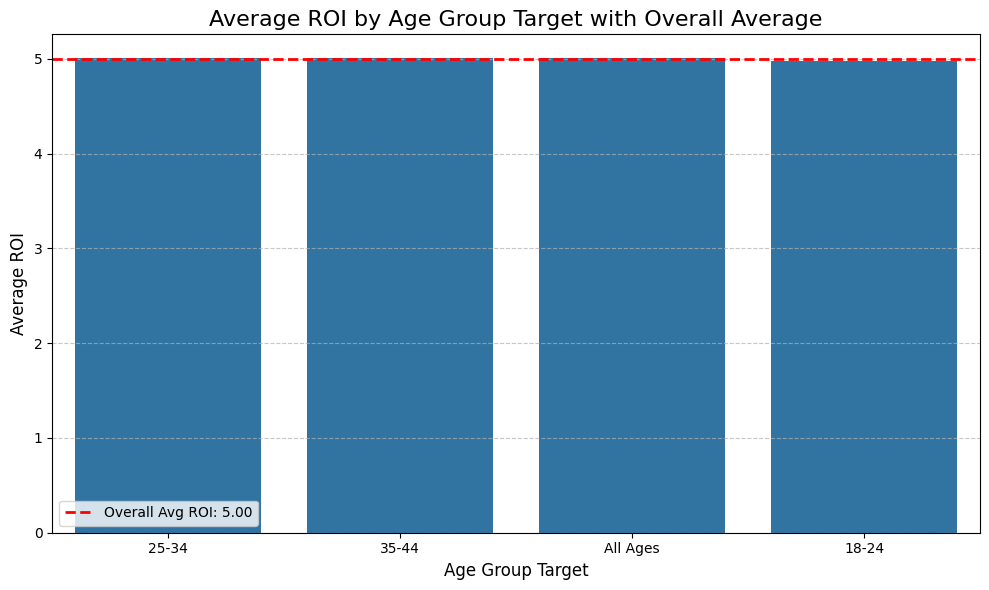

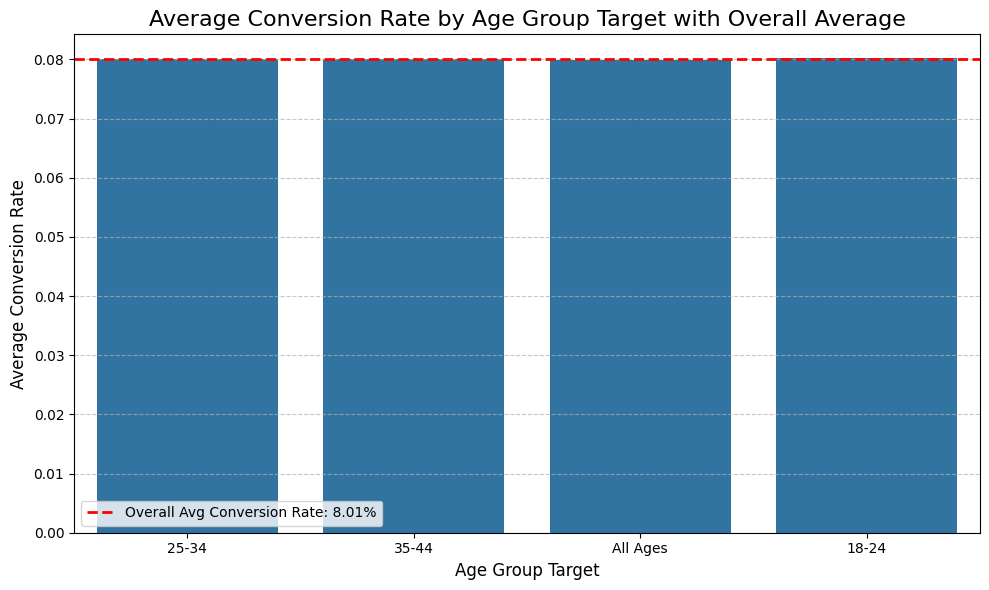

In [12]:
# By Age Group Target

print("\n--- Performance by Age Group Target ---")

# Step 12.1: Group by Age_Group_Target and calculate average key metrics
age_group_performance = df.groupby('Age_Group_Target').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Avg_Acquisition_Cost=('Acquisition_Cost', 'mean'),
    Total_Estimated_Profit=('Estimated_Profit', 'sum'),
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum')
).sort_values(by='Avg_ROI', ascending=False) # Sort by ROI first

print("\nPerformance by Age Group Target (Sorted by Average ROI):")
print(age_group_performance)

# Visualize Performance by Age Group Target

# Plot Average ROI by Age Group Target
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_performance.index, y=age_group_performance['Avg_ROI'])
plt.axhline(overall_avg_roi, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ROI: {overall_avg_roi:.2f}')
plt.title('Average ROI by Age Group Target with Overall Average', fontsize=16)
plt.xlabel('Age Group Target', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Average Conversion Rate by Age Group Target
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_performance.index, y=age_group_performance['Avg_Conversion_Rate'])
plt.axhline(overall_avg_conversion_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Avg Conversion Rate: {overall_avg_conversion_rate:.2%}')
plt.title('Average Conversion Rate by Age Group Target with Overall Average', fontsize=16)
plt.xlabel('Age Group Target', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Observations:**
- Once again, Age Group does not provide any differences across KPI.

**It appears that the average performance across broad categories like campaign type, channel used, gender target, and age group target is remarkably consistent.**


--- Correlation Analysis ---

Correlation Matrix:
                       Engagement_Score  Conversion_Rate       ROI    Clicks  \
Engagement_Score               1.000000        -0.000638  0.000588 -0.001908   
Conversion_Rate               -0.000638         1.000000 -0.001143  0.000269   
ROI                            0.000588        -0.001143  1.000000 -0.002040   
Clicks                        -0.001908         0.000269 -0.002040  1.000000   
Impressions                    0.003030        -0.002834  0.002257  0.000033   
Cost_Per_Click                 0.000976         0.002525  0.004575 -0.727437   
Click_Through_Rate            -0.005747        -0.000049 -0.002116  0.506526   
Estimated_Conversions          0.002560         0.691840  0.000519  0.001189   
Cost_Per_Acquisition          -0.001817        -0.477692 -0.000365 -0.000143   
Estimated_Profit              -0.002566        -0.000031  0.687625 -0.001460   

                       Impressions  Cost_Per_Click  Click_Through_Ra

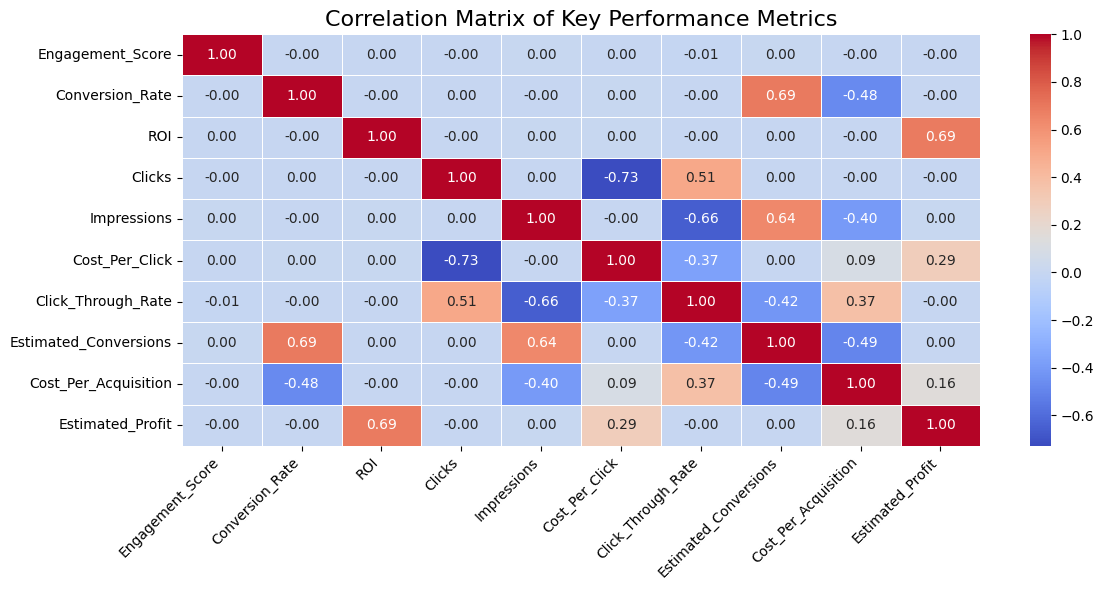

In [18]:
# Investigate correlation with numeric features

print("\n--- Correlation Analysis ---")

correlation_cols = [
    'Engagement_Score',
    'Conversion_Rate',
    'ROI',
    'Clicks',
    'Impressions',
    'Cost_Per_Click',
    'Click_Through_Rate',
    'Estimated_Conversions',
    'Cost_Per_Acquisition',
    'Estimated_Profit'
]

correlation_matrix = df[correlation_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Performance Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Correlation Observations and Insights:**

1 - Engagement_Score vs. Conversion_Rate and ROI:
- Engagement_Score and Conversion_Rate: -0.000638 (Almost zero)
- Engagement_Score and ROI: 0.000588 (Almost zero)
> The data suggests that linear relationship doesn't exist between the Engagement_Score vs. ROI and Coversion Rate. In other words,this "engagement score" does not drive conversion and sales. GigaGrow might be spending resources on campaigns that increase this "engagement score", but aren't delivering on core business objectives.

2 - Conversion_Rate vs. Estimated_Conversions:
- Correlation: 0.691840 (Strong positive correlation)
> Expected. As the conversion rate goes up, GigagGrow naturally get more total conversions

3 - Conversion_Rate vs. Cost_Per_Acquisition:
- Correlation: -0.477692 (Moderate negative correlation)
> Expected. Improving conversion rate is key to reducing CPA.

4 - ROI vs. Estimated_Profit:
- Correlation: 0.687625 (Strong positive correlation)
> Expected. As ROI goes up, GigraGrow gets more profit for every dollar spent. 

5 - Clicks vs. Cost_Per_Click:
- Correlation: -0.727437 (Strong negative correlation)
> A very strong inverse relationship. As the number of Clicks a campaign generates increases, the Cost_Per_Click for that campaign tends to decrease significantly. The data suggests that campaigns that are more successful at generating a large volume of clicks are also more efficient on a per-click basis. Broad targeting can lead to many clicks at lower CPCs, but the quality of those clicks might vary. However, combined with other metrics, it suggests efficiency.

6 - Clicks vs. Click_Through_Rate:
- Correlation: 0.506526 (Moderate positive correlation)
> Expected. Campaigns that are good at getting people to click are also naturally good at having a high percentage of viewers click.

7 - Impressions vs. Click_Through_Rate:
- Correlation: -0.657538 (Strong negative correlation)
> A strong inverse relationship. As Impressions increase, Click_Through_Rate tends to decrease. Campaigns aiming for very high impressions often use broader targeting to reach a larger audience. If the same ad is shown too many times to the same audience (contributing to high impressions), people might become less likely to click on it over time. GigaGrow could optimize to have better efficiency ads. They might be getting wide reach, but at the cost of engagement quality (as measured by CTR).

8 - Impressions vs. Estimated_Conversions:
- Correlation: 0.641897 (Moderate positive correlation)
> Expected. As more people seeing the ads (more impressions), more opportunities for clicks, and subsequently, more opportunities for conversions.Broader reach can lead to more overall conversions, even if the CTR per impression drops.

--------------------------------------------------------------------------------------------------------------------------------------

**Overall Summary of Correlations:**
- **No Link between Engagement and Bottom Line:** 
> The most critical takeaway. GigaGrow is likely measuring "engagement" in a way that doesn't directly contribute to their financial goals (conversions and profit). They should investigate their engagement metric, its calculation, and whether it's truly a useful KPI for their business objectives.

- **High Impressions & CTR:**
> GigaGrow could balance scale (impressions) with quality (CTR) in their campaign strategies to strive for better efficiency.

--------------------------------------------------------------------------------------------------------------------------------------

**Recommendations:**

> 1 - Re-evaluate the Engagement_Score is the primary recommendation.
- If it's not driving conversions or ROI, then focusing on improving it is a misallocation of resources.

> 2 - Improving Conversion_Rate. 
- Since it strongly negatively correlates with Cost_Per_Acquisition and positively with Estimated_Conversions, optimizing landing pages, offers, and user experience to boost conversion rates will directly improve profitability.

> 3 - Focus on strategies that drive high volumes of clicks, as these campaigns are more cost-efficient on a per-click basis
-  The strong negative correlation between Clicks and Cost_Per_Click suggests that campaigns designed to maximize qualified clicks are more cost-effective.

> 4 - Optimize the Impressions-CTR Trade-off
- For campaigns aiming for high impressions, GigaGrow needs to analyze if the decreased CTR is acceptable for the total conversions achieved, or if they need to refine targeting for better quality impressions even if the volume is lower. 




--- Geographical Performance by Location ---

Performance by Location (Sorted by Average ROI):
              Avg_ROI  Avg_Conversion_Rate  Avg_Acquisition_Cost  \
Location                                                           
Miami        5.012282             0.080047          12515.208001   
Los Angeles  5.010876             0.080013          12532.539765   
Houston      5.007203             0.079948          12454.387245   
Chicago      5.001590             0.080134          12515.161585   
New York     4.980228             0.080204          12504.317984   

             Total_Estimated_Profit  Total_Estimated_Conversions  
Location                                                          
Miami                  2.526102e+09                     17722192  
Los Angeles            2.509377e+09                     17578251  
Houston                2.481981e+09                     17494053  
Chicago                2.505584e+09                     17599335  
New York               2.

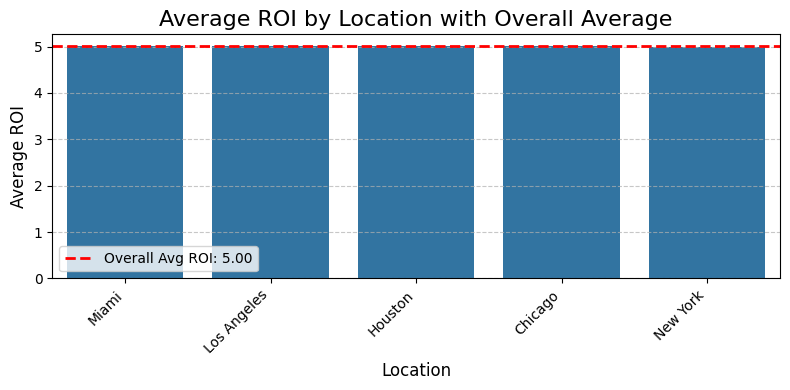

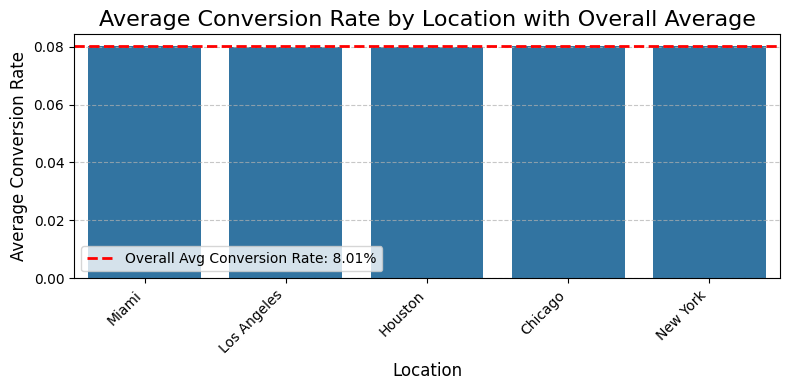

In [ ]:
# Investigate Geographical Performance (Location)


print("\n--- Geographical Performance by Location ---")


location_performance = df.groupby('Location').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Avg_Acquisition_Cost=('Acquisition_Cost', 'mean'),
    Total_Estimated_Profit=('Estimated_Profit', 'sum'),
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum')
).sort_values(by='Avg_ROI', ascending=False)

print("\nPerformance by Location (Sorted by Average ROI):")
print(location_performance)

# Plot Average ROI by Location
plt.figure(figsize=(8, 4))
sns.barplot(x=location_performance.index, y=location_performance['Avg_ROI'])
plt.axhline(overall_avg_roi, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ROI: {overall_avg_roi:.2f}')
plt.title('Average ROI by Location with Overall Average', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Average Conversion Rate by Location
plt.figure(figsize=(8, 4))
sns.barplot(x=location_performance.index, y=location_performance['Avg_Conversion_Rate'])
plt.axhline(overall_avg_conversion_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Avg Conversion Rate: {overall_avg_conversion_rate:.2%}')
plt.title('Average Conversion Rate by Location with Overall Average', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Observations for Location:**
> Just like with Campaign Type, Channels Used, and Target Audience demographics, Location does not appear to be a significant differentiating factor for campaign performance when looking at average ROI and Conversion Rate.


--- Performance by Language ---

Performance by Language (Sorted by Average ROI):
           Avg_ROI  Avg_Conversion_Rate  Total_Estimated_Profit  \
Language                                                          
French    5.011375             0.080254            2.491522e+09   
Mandarin  5.007313             0.080036            2.518443e+09   
Spanish   5.001705             0.079918            2.518432e+09   
German    5.001054             0.079973            2.497575e+09   
English   4.990734             0.080169            2.491416e+09   

          Total_Estimated_Conversions  
Language                               
French                       17510131  
Mandarin                     17760715  
Spanish                      17587708  
German                       17677529  
English                      17597905  


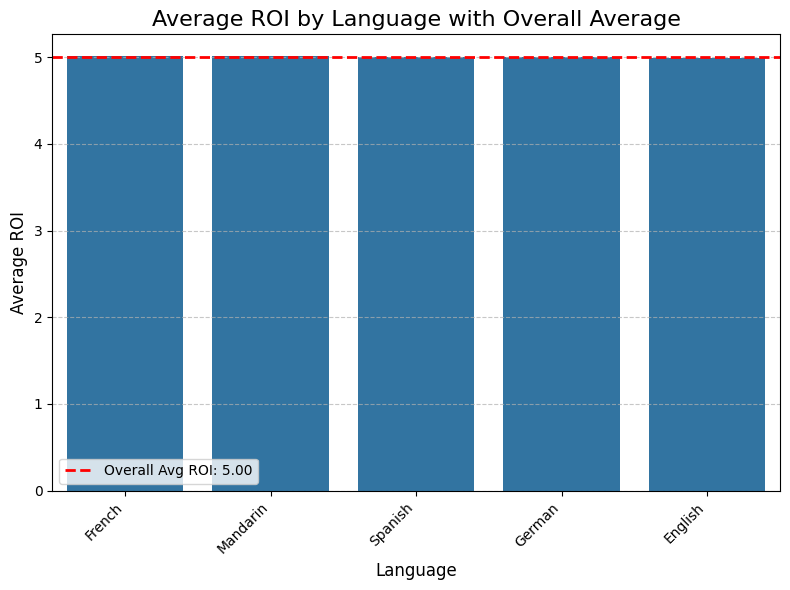

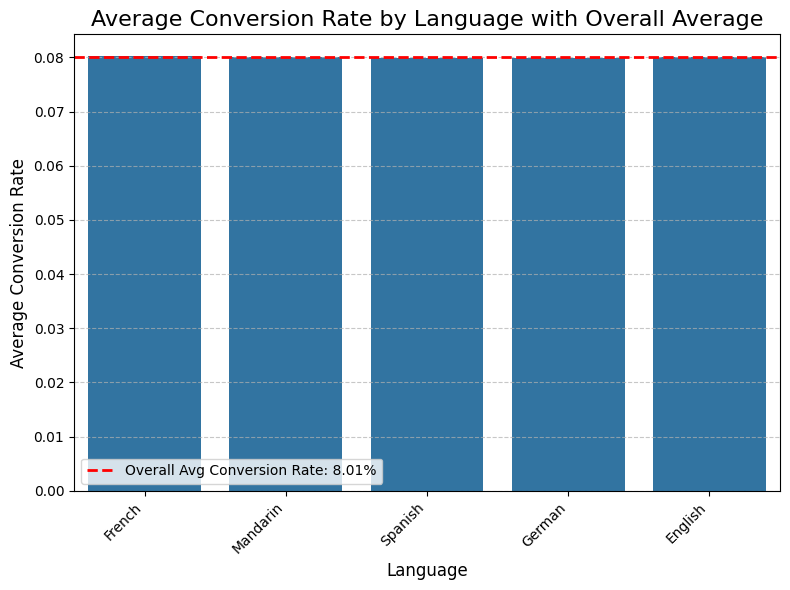

In [26]:
# Investigate Geographical Performance (Language)

# Assuming df is your DataFrame

print("\n--- Performance by Language ---")

# Step 15.1: Group by Language and calculate average key metrics
language_performance = df.groupby('Language').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Total_Estimated_Profit=('Estimated_Profit', 'sum'), # Sum profit per language
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum')
).sort_values(by='Avg_ROI', ascending=False) # Sort by ROI first

print("\nPerformance by Language (Sorted by Average ROI):")
print(language_performance)

# Visualize Performance by Language

# Plot Average ROI by Language
plt.figure(figsize=(8, 6))
sns.barplot(x=language_performance.index, y=language_performance['Avg_ROI'])
plt.axhline(overall_avg_roi, color='red', linestyle='--', linewidth=2, label=f'Overall Avg ROI: {overall_avg_roi:.2f}')
plt.title('Average ROI by Language with Overall Average', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Average Conversion Rate by Language
plt.figure(figsize=(8, 6))
sns.barplot(x=language_performance.index, y=language_performance['Avg_Conversion_Rate'])
plt.axhline(overall_avg_conversion_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Avg Conversion Rate: {overall_avg_conversion_rate:.2%}')
plt.title('Average Conversion Rate by Language with Overall Average', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Observations:**
- As with Campaign Type, Channel Used, Target Audience demographics, and Location, the Language of the campaign does not appear to be a significant differentiating factor for campaign performance when looking at average ROI and Conversion Rate.

In [27]:
# Investigate Time-Based Trends
# Assuming df is your DataFrame

print("\n--- Time-Based Trends by Month ---")

# Step 16.1: Group by Month_Name and calculate average key metrics
# Ensure Month_Name is ordered correctly for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

monthly_performance = df.groupby('Month_Name').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_Conversion_Rate=('Conversion_Rate', 'mean'),
    Total_Estimated_Profit=('Estimated_Profit', 'sum'),
    Total_Estimated_Conversions=('Estimated_Conversions', 'sum')
).sort_values(by='Month_Name') # Sort by month name to get chronological order

print("\nPerformance by Month (Sorted Chronologically):")
print(monthly_performance)


--- Time-Based Trends by Month ---

Performance by Month (Sorted Chronologically):
             Avg_ROI  Avg_Conversion_Rate  Total_Estimated_Profit  \
Month_Name                                                          
January     5.014595             0.080084            1.064884e+09   
February    5.005248             0.080181            9.586722e+08   
March       4.983404             0.080032            1.057568e+09   
April       4.994372             0.080460            1.026734e+09   
May         5.018923             0.079781            1.063085e+09   
June        4.985203             0.080078            1.023603e+09   
July        4.983045             0.079952            1.057927e+09   
August      4.997793             0.079725            1.066825e+09   
September   5.029044             0.080243            1.038333e+09   
October     5.016445             0.079819            1.067964e+09   
November    4.999271             0.080301            1.028482e+09   
December    5.00212

C:\Users\luket\AppData\Local\Temp\ipykernel_20624\277169943.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_performance = df.groupby('Month_Name').agg(


**Observations:**
- Again, there are no significant seasonal trends in average ROI or Conversion Rate. GigaGrow's campaigns appear to perform consistently throughout the year.

In [30]:
# Identify Underperforming Campaigns
# Assuming df is your DataFrame

print("\n--- Identifying Underperforming Campaigns ---")

# Step 17.1: Define a threshold for "underperforming" CPA
# Let's use the IQR method's upper bound for outliers, as it statistically identifies "extreme" values.
# Why: This provides a data-driven definition of "underperforming" rather than an arbitrary number.
Q1_cpa = df['Cost_Per_Acquisition'].quantile(0.25)
Q3_cpa = df['Cost_Per_Acquisition'].quantile(0.75)
IQR_cpa = Q3_cpa - Q1_cpa
underperforming_cpa_threshold = Q3_cpa + 1.5 * IQR_cpa

print(f"Calculated CPA threshold for underperforming campaigns (IQR method): ${underperforming_cpa_threshold:,.2f}")
print(f"Overall Average CPA: ${df['Cost_Per_Acquisition'].mean():,.2f}")


# Step 17.2: Filter for underperforming campaigns
underperforming_campaigns = df[df['Cost_Per_Acquisition'] > underperforming_cpa_threshold]

print(f"\nNumber of underperforming campaigns (CPA > ${underperforming_cpa_threshold:,.2f}): {len(underperforming_campaigns)}")



--- Identifying Underperforming Campaigns ---
Calculated CPA threshold for underperforming campaigns (IQR method): $145.39
Overall Average CPA: $63.32

Number of underperforming campaigns (CPA > $145.39): 18406
